# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
plt.style.use('ggplot')

# https://www.kaggle.com/neviadomski/two-sigma-connect-rental-listing-inquiries/data-exploration-two-sigma-renthop

# Read

In [2]:
train_data = pd.read_json('data/train.json')
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


## Check for Nan

In [3]:
train_data.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

## Distribution of Target variable

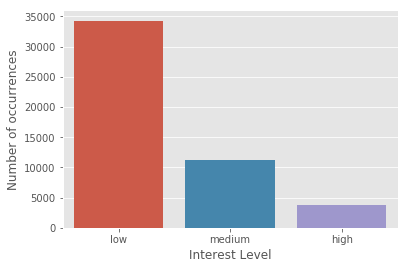

In [4]:
sns.countplot(train_data.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

## Quantitative substitute of Interest Level
Replace *'low', 'medium', 'high'* with *0, 1, 2*

In [5]:
train_data['interest'] = np.where(train_data.interest_level=='low', 0,
                                  np.where(train_data.interest_level=='medium', 1, 2))

### Bathrooms

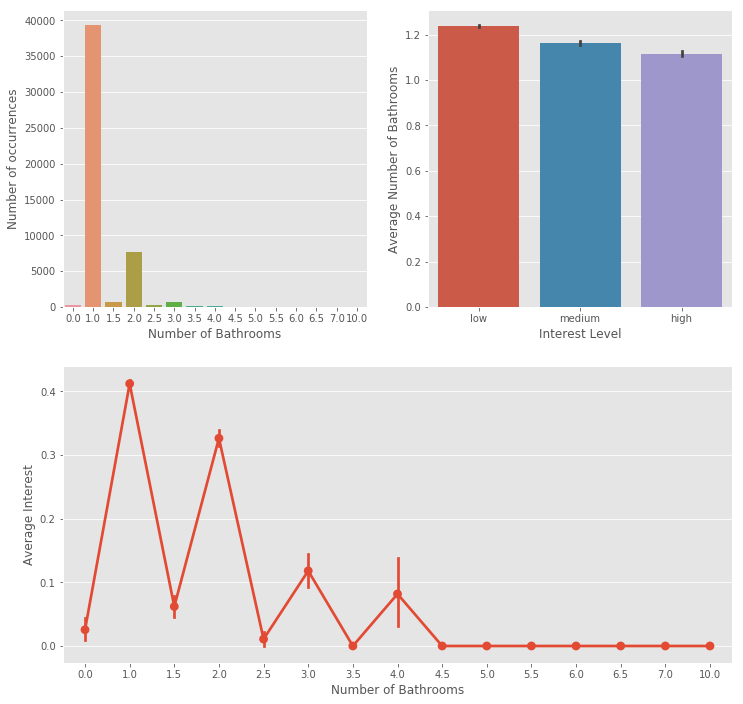

In [6]:
### Bathrooms graphs
fig = plt.figure(figsize=(12,12))

### Number of occurrences
sns.countplot(train_data.bathrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

### Average number of Bathrooms per Interest Level
sns.barplot(x='interest_level', y='bathrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');

### Average interest for every number of bathrooms
sns.pointplot(x="bathrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Average Interest');

### Bedrooms

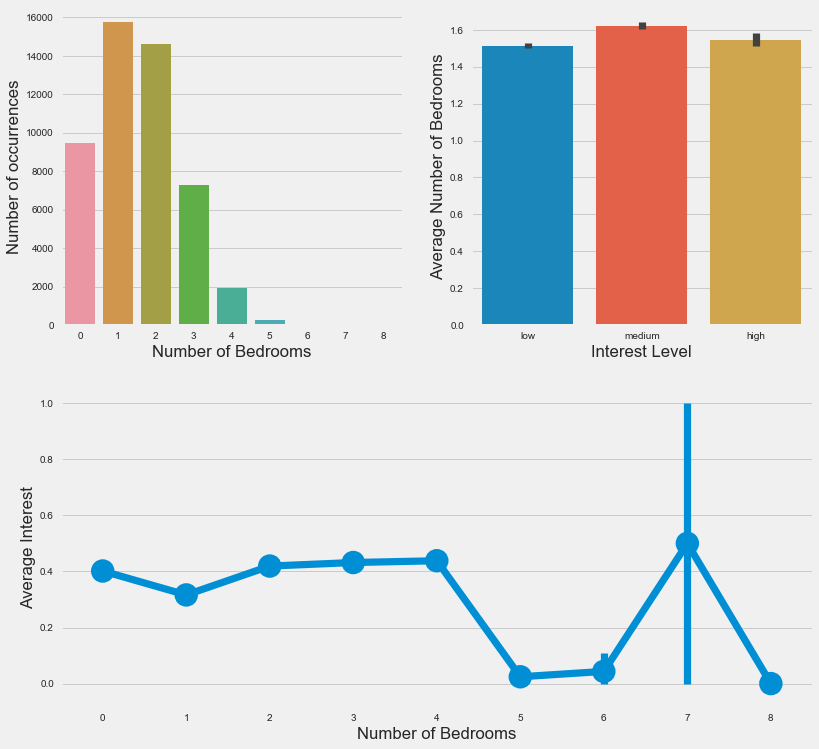

In [20]:
### Bedrooms graphs
fig = plt.figure(figsize=(12,12))
### Number of occurrences
sns.countplot(train_data.bedrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');

### Average number of Bedrooms per Interest Level
sns.barplot(x='interest_level', y='bedrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bedrooms');

### Average interest for every number of bedrooms
sns.pointplot(x="bedrooms", y="interest", data=train_data, ax = plt.subplot(212));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Average Interest');

### Most advertised buildings

In [25]:
train_data.building_id.value_counts().nlargest(10)

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
Name: building_id, dtype: int64

In [27]:
### Convertion to Python Date
train_data.created = pd.to_datetime(train_data.created, format='%Y-%m-%d %H:%M:%S')
                                    
### New Month, Day of Week and Hour Features
train_data['month'] = train_data.created.dt.month
train_data['day_of_week'] = train_data.created.dt.weekday_name
train_data['hour'] = train_data.created.dt.hour

In [31]:
### First date in DataFrame
print('First advert created at: {}'.format(train_data.created.nsmallest(1).values[0]))
### Last date in DataFrame
print('Last advert created at: {}'.format(train_data.created.nlargest(1).values[0]))

First advert created at: 2016-04-01T22:12:41.000000000
Last advert created at: 2016-06-29T21:41:47.000000000


### Interest per month

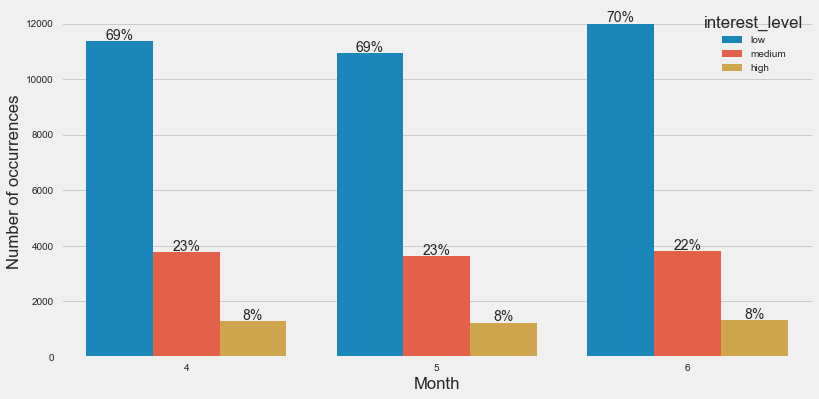

In [32]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=train_data);
plt.xlabel('Month');
plt.ylabel('Number of occurrences')

### Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

### Interest per Day of Week

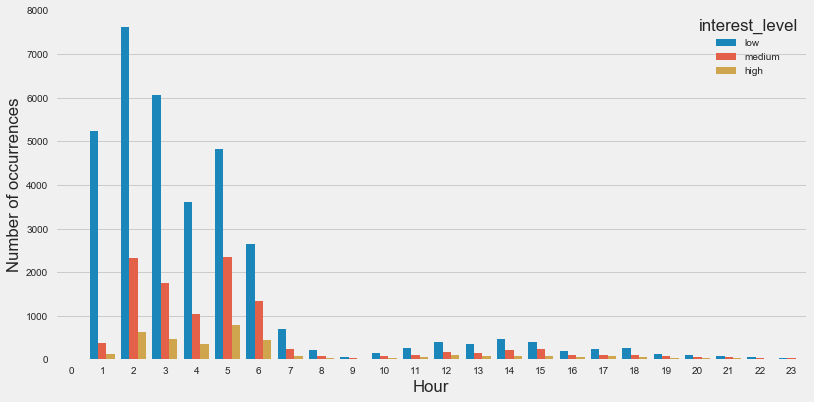

In [34]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train_data);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

### Number of unique Display Addresses

In [35]:
print('Number of Unique Display Addresses is {}'.format(train_data.display_address.value_counts().shape[0]))

Number of Unique Display Addresses is 8826


In [36]:
### 15 most popular Display Addresses
train_data.display_address.value_counts().nlargest(15)

Broadway             438
East 34th Street     355
Second Avenue        349
Wall Street          332
West 37th Street     287
West Street          258
First Avenue         244
Gold Street          241
Washington Street    237
York Avenue          228
John Street          214
Water Street         214
East 39th Street     200
East 89th Street     195
West 54th Street     193
Name: display_address, dtype: int64

In [37]:
### Top 20 northernmost points
train_data.latitude.nlargest(20)

78568     44.8835
16405     44.6038
18267     43.0346
81815     42.8725
4719      42.8724
24747     42.3459
80360     42.3459
85995     42.3459
872       42.3459
62409     42.3033
73065     42.3033
117255    42.2509
114889    42.2019
39046     42.2019
41022     42.2019
57131     42.2019
72896     41.7530
18023     41.0868
71920     41.0868
100346    41.0412
Name: latitude, dtype: float64

In [38]:
### Top 20 southernmost points
train_data.latitude.nsmallest(20)

106350     0.0000
2028       0.0000
37426      0.0000
39134      0.0000
46941      0.0000
49884      0.0000
63688      0.0000
66197      0.0000
69423      0.0000
70841      0.0000
76934      0.0000
85521      0.0000
39798     34.0126
121891    39.7996
104822    39.8395
114028    40.0450
108994    40.1159
41067     40.5065
65759     40.5065
66032     40.5065
Name: latitude, dtype: float64

In [39]:
### Top 20 westernmost points
train_data.longitude.nsmallest(20)

39798    -118.2710
78568     -93.2705
72896     -87.6134
104822    -86.1527
18267     -76.6336
114028    -75.5214
16405     -75.1773
109507    -74.6637
108994    -74.6267
121891    -74.6248
90453     -74.5343
41067     -74.4708
65759     -74.2432
66032     -74.2432
82709     -74.2432
102756    -74.2224
113552    -74.2224
113599    -74.2224
85617     -74.2224
26937     -74.2160
Name: longitude, dtype: float64

### Rent interest graph of New-York

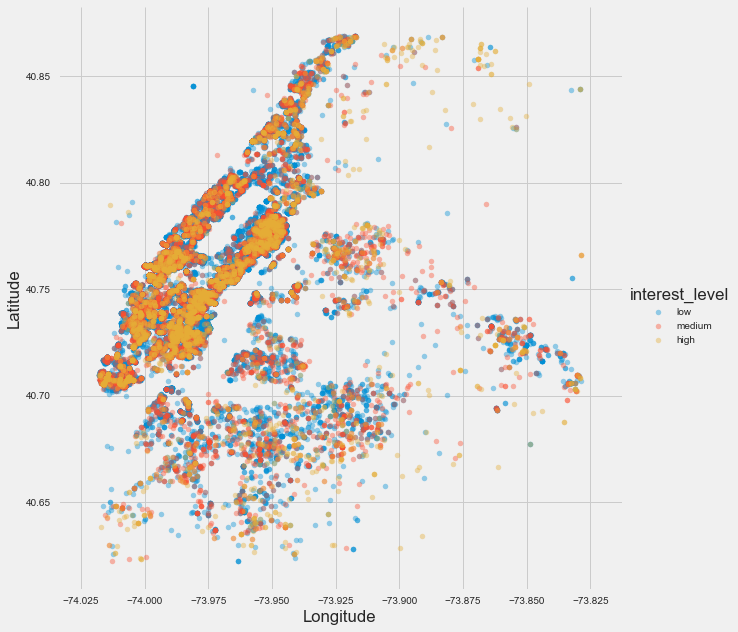

In [40]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train_data[(train_data.longitude>train_data.longitude.quantile(0.005))
                           &(train_data.longitude<train_data.longitude.quantile(0.995))
                           &(train_data.latitude>train_data.latitude.quantile(0.005))                           
                           &(train_data.latitude<train_data.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

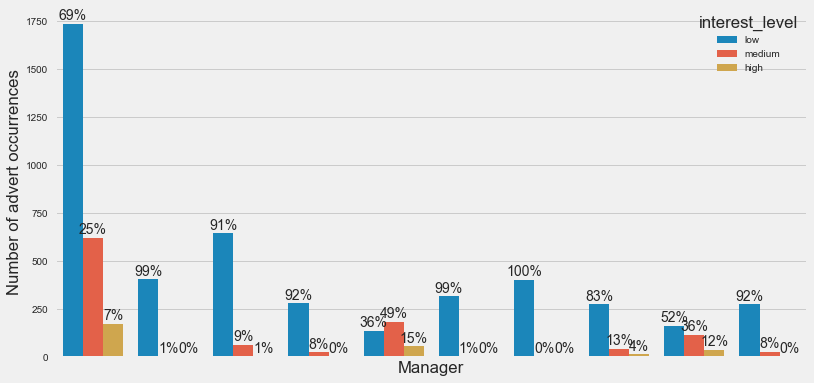

In [42]:
### Let's get a list of top 10 managers
top10managers = train_data.manager_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="manager_id", hue="interest_level",
                   data=train_data[train_data.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

In [43]:
### Getting number of photos
train_data['photos_number'] = train_data.photos.str.len()

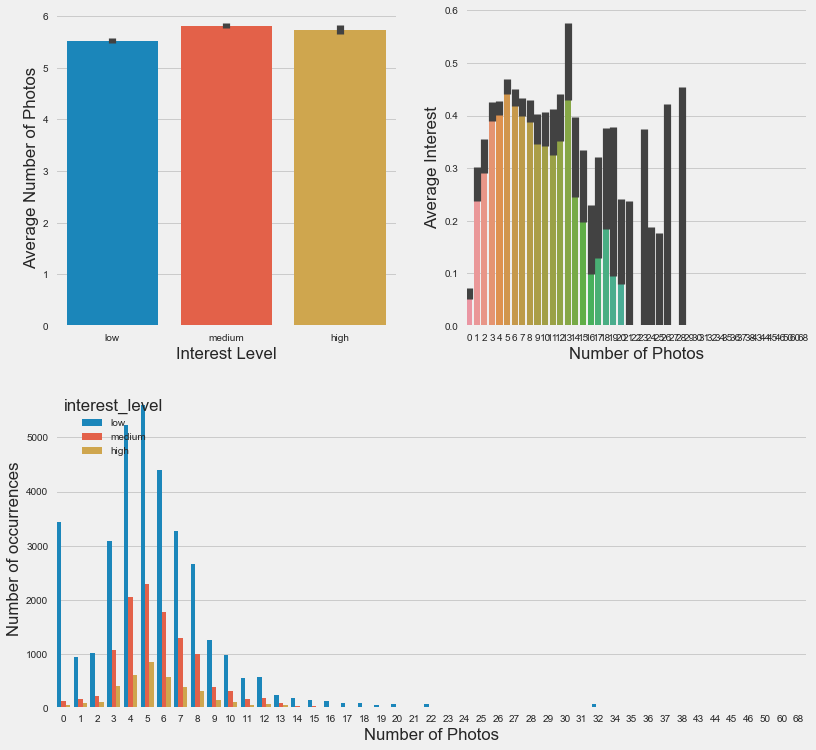

In [44]:
### Number of photos graphs
fig = plt.figure(figsize=(12,12))

### Average number of Photos per Interest Level
sns.barplot(x="interest_level", y="photos_number", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(221));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Photos');

### Average interest for every number of photos
sns.barplot(x="photos_number", y="interest", data=train_data, ax=plt.subplot(222));
plt.xlabel('Number of Photos');
plt.ylabel('Average Interest');

### Number of occurrences
sns.countplot(x='photos_number', hue='interest_level', hue_order=['low', 'medium', 'high'],
              data=train_data, ax=plt.subplot(212));
plt.xlabel('Number of Photos');
plt.ylabel('Number of occurrences');

### Price exploration

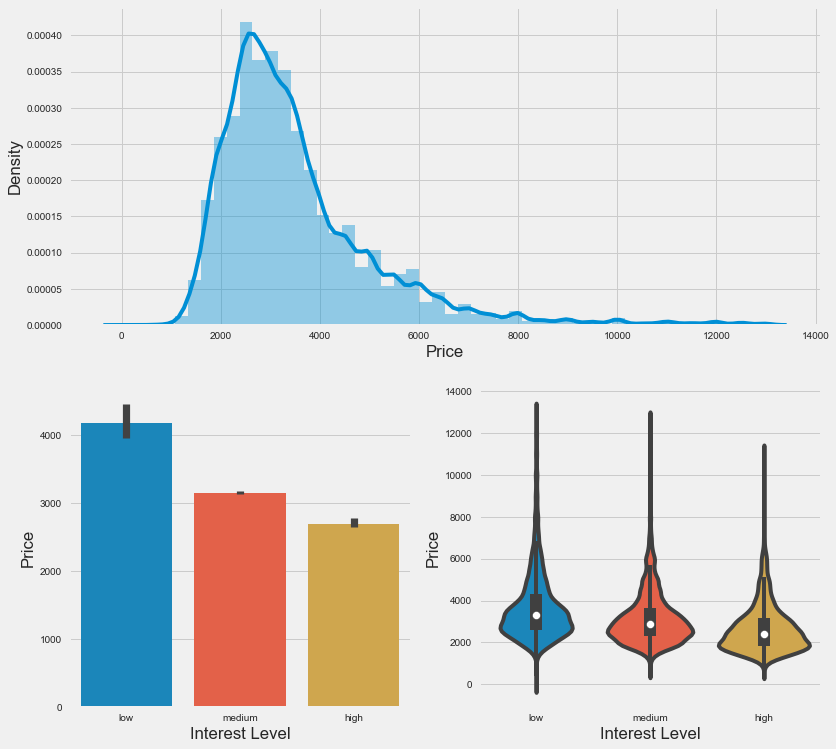

In [45]:
fig = plt.figure(figsize=(12,12))

### Price distribution
sns.distplot(train_data.price[train_data.price<=train_data.price.quantile(0.99)], ax=plt.subplot(211));
plt.xlabel('Price');
plt.ylabel('Density');

### Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train_data, ax=plt.subplot(223));
plt.xlabel('Interest Level');
plt.ylabel('Price');

### Violinplot of price for every Interest Level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
               data=train_data[train_data.price<=train_data.price.quantile(0.99)],
               ax=plt.subplot(224));
plt.xlabel('Interest Level');
plt.ylabel('Price');